In [1]:
from colorrefinement import *
from c2 import *
import json, csv
import networkx as nx
import numpy as np
from GC2NodeClassifier import GC2NodeClassifier

In [2]:
formulas = [
    GuardedExistsEq(10, Var.y, E(Var.x, Var.y)),
    GuardedExistsGeq(4, Var.y, Or(GuardedExistsLeq(7, Var.x, E(Var.x, Var.y)), GuardedExistsGeq(13, Var.x, E(Var.x, Var.y)))),
    GuardedExistsGeq(9, Var.y, GuardedExistsLeq(13, Var.x, GuardedExistsGeq(7, Var.y, E(Var.x, Var.y)))),
]
graph = nx.fast_gnp_random_graph(1000, 0.01)
for formula in formulas:
    for i in range(graph.number_of_nodes()):
        graph.nodes[i][repr(formula)] = formula.evaluate(graph, i)

In [3]:
for formula in formulas:
    print(f"{formula}:\n")
    print(f"{len([node for node in graph.nodes if graph.nodes[node][repr(formula)]])/graph.number_of_nodes()}")

∃=10y.(E(x, y) ∧ E(x, y)):

0.128
∃≥4y.(E(x, y) ∧ (∃≤7x.(E(x, y) ∧ E(x, y)) ∨ ∃≥13x.(E(x, y) ∧ E(x, y)))):

0.611
∃≥9y.(E(x, y) ∧ ∃≤13x.(E(x, y) ∧ ∃≥7y.(E(x, y) ∧ E(x, y)))):

0.466


In [13]:
from cProfile import Profile
from pstats import SortKey, Stats
with Profile() as prof:
    clf = GC2NodeClassifier(graph, [], repr(formulas[2]), evaluation_depth=2)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(40)
    )

         24362 function calls (24352 primitive calls) in 0.017 seconds

   Ordered by: cumulative time
   List reduced from 320 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5029    0.003    0.000    0.008    0.000 convert_matrix.py:590(<genexpr>)
     5029    0.004    0.000    0.005    0.000 reportviews.py:845(__iter__)
        1    0.000    0.000    0.003    0.003 _coo.py:132(__init__)
        1    0.000    0.000    0.002    0.002 function.py:1208(<genexpr>)
        9    0.002    0.000    0.002    0.000 {built-in method numpy.array}
       23    0.002    0.000    0.002    0.000 {built-in method numpy.asarray}
        5    0.000    0.000    0.001    0.000 _base.py:1269(_get_index_dtype)
        5    0.000    0.000    0.001    0.000 _sputils.py:147(get_index_dtype)
     5028    0.001    0.000    0.001    0.000 reportviews.py:779(<lambda>)
     1000    0.001    0.000    0.001    0.000 <frozen _collections_abc>:811(__contains_

In [42]:
clf._extend()

False

In [33]:
len(clf.features)

[⊤,
 ∃≥14y.E(x, y),
 ∃≥2y.E(x, y),
 ∃≥16y.E(x, y),
 (∃≥2y.E(x, y) ∧ ∃≤13y.E(x, y)),
 (∃≥14y.E(x, y) ∧ ∃≤15y.E(x, y)),
 (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y)),
 ∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y)),
 ∃≥10y.(E(x, y) ∧ (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y))),
 ∃≥2y.(E(x, y) ∧ (∃≥16y.E(x, y) ∨ ∃≤1y.E(x, y))),
 (∃≥10y.(E(x, y) ∧ (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y))) ∧ ∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y)) ∧ ∃≤9y.(E(x, y) ∧ (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y)))),
 (∃≥10y.(E(x, y) ∧ (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y))) ∧ ∃≤8y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≤9y.(E(x, y) ∧ (∃≥2y.E(x, y) ∧ ∃≤15y.E(x, y))) ∧ ∃≤8y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≥2y.(E(x, y) ∧ (∃≥16y.E(x, y) ∨ ∃≤1y.E(x, y))) ∧ ∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≤1y.(E(x, y) ∧ (∃≥16y.E(x, y) ∨ ∃≤1y.E(x, y))) ∧ ∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≥2y.(E(x, y) ∧ (∃≥16y.E(x, y) ∨ ∃≤1y.E(x, y))) ∧ ∃≤8y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≤1y.(E(x, y) ∧ (∃≥16y.E(x, y) ∨ ∃≤1y.E(x, y))) ∧ ∃≤8y.(E(x, y) ∧ ∃≤13y.E(x, y))),
 (∃≥10y.(E(x, y) ∧ (∃≥2y.E(x, y) 

In [34]:
clf.formula().simplify()

∃≥9y.(E(x, y) ∧ ∃≤13y.E(x, y))

In [35]:
clf.accuracy()

0.968494

[Text(0.4, 0.8333333333333334, 'x[19] <= 3.5\nsquared_error = 1.052\nsamples = 1000\nvalue = -0.228'),
 Text(0.2, 0.5, 'squared_error = -0.0\nsamples = 389\nvalue = -1.253'),
 Text(0.6, 0.5, 'x[11] <= 0.5\nsquared_error = 0.0\nsamples = 611\nvalue = 0.798'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 110\nvalue = 0.798'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 501\nvalue = 0.798')]

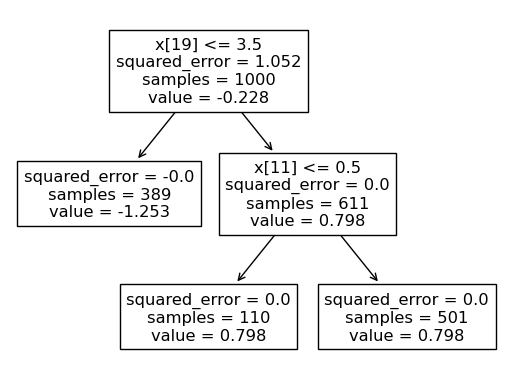

In [9]:
import sklearn
sklearn.tree.plot_tree(clf.dt)